In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('data.csv')

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Data Cleaning and Data Exploration

Our goal is to predict if a patient will be a no show. This dataset is very symptome centric and uses Hipertension, Diabetes, Alcholism and Handicaps as the binary features. Other binary features include Gender, Scholorship, and SMS_received.

Neighborhood is complicated, it's coordinates will need to be researched in order to be useful, but it will give us more insight on the potential socio-economic background of the patient.

Age may need to be encoded with the OneHot method, or we can encode them all into floats. 

Time is also an important factor, the Scheduled Day and Appointment day are features that will need to be cleaned up. Finding the difference between scheduled day and appointment day will provide useful insights, along with finding the time of appointment.

In [13]:
target = ['No-show']
features = ['Neighbourhood', 'Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received']

In [14]:
import category_encoders as ce

encoder = ce.OneHotEncoder(use_cat_names=True)

X = encoder.fit_transform(df[features])
X.head()

/home/django/PycharmProject/python for healthcare/venv/lib/python3.6/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Neighbourhood_JARDIM DA PENHA,Neighbourhood_MATA DA PRAIA,Neighbourhood_PONTAL DE CAMBURI,Neighbourhood_REPÚBLICA,Neighbourhood_GOIABEIRAS,Neighbourhood_ANDORINHAS,Neighbourhood_CONQUISTA,Neighbourhood_NOVA PALESTINA,Neighbourhood_DA PENHA,Neighbourhood_TABUAZEIRO,...,Neighbourhood_NAZARETH,Neighbourhood_AEROPORTO,Neighbourhood_ILHAS OCEÂNICAS DE TRINDADE,Neighbourhood_PARQUE INDUSTRIAL,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

y = df[target]
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, encoded_Y, test_size=0.33, random_state=42)


/home/django/PycharmProject/python for healthcare/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [16]:
# evaluate a perceptron model on the dataset
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron

model = Perceptron()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.760 (0.050)


In [17]:
# intro to perceptrons
# https://machinelearningmastery.com/perceptron-algorithm-for-classification-in-python/

In [19]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import os

logdir = os.path.join("logs", "EarlyStopping-Loss")

tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
stop = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3)

model = Sequential()
model.add(Dense(1, input_dim=87, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_history = model.fit(X_train,y_train, epochs=5,
              validation_data=(X_test, y_test),
              callbacks=[tensorboard_callback, stop])


Epoch 1/5
2315/2315 [==============================] - 3s 1ms/step - loss: 0.5342 - accuracy: 0.7861 - val_loss: 0.4977 - val_accuracy: 0.7999
Epoch 2/5
2315/2315 [==============================] - 2s 1ms/step - loss: 0.4967 - accuracy: 0.7972 - val_loss: 0.4916 - val_accuracy: 0.7999
Epoch 3/5
2315/2315 [==============================] - 2s 916us/step - loss: 0.4939 - accuracy: 0.7972 - val_loss: 0.4908 - val_accuracy: 0.7999
Epoch 4/5
2315/2315 [==============================] - 2s 916us/step - loss: 0.4934 - accuracy: 0.7972 - val_loss: 0.4907 - val_accuracy: 0.7999
Epoch 5/5
2315/2315 [==============================] - 2s 940us/step - loss: 0.4933 - accuracy: 0.7972 - val_loss: 0.4907 - val_accuracy: 0.7999


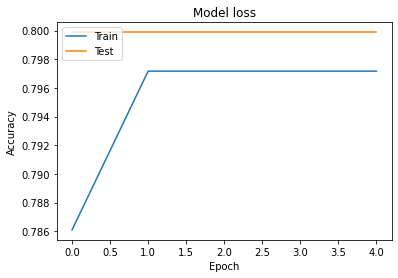

In [20]:
# Plot training & validation accuracy values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show();

In [61]:
model.predict_classes(X_test[:1].values.tolist())

/home/django/PycharmProject/python for healthcare/venv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0]], dtype=int32)